In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Hannanum     # 자연어 처리할 때 필요한 라이브러리

In [29]:
import re

In [30]:
import networkx as nx

In [31]:
hannanum = Hannanum()

In [32]:
f = open('우크라이나.csv', 'r', encoding='cp949')

In [33]:
lines = f.readlines()

In [34]:
f.close()
dataset = []

In [35]:
for i in range(len(lines)):
  dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]','', lines[i])))
dataset[:3]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_6280\2461424470.py:2: SyntaxWarning: invalid escape sequence '\s'
  dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]','', lines[i])))


[['파국', '초래', '말'],
 ['코', '시장', '침체', '두나무', '빗썸', '이익', '급감'],
 ['러시아', '자충수', '코앞', '핀란드', '나토', '정식', '회원국']]

In [36]:
dataset[:100]

[['파국', '초래', '말'],
 ['코', '시장', '침체', '두나무', '빗썸', '이익', '급감'],
 ['러시아', '자충수', '코앞', '핀란드', '나토', '정식', '회원국'],
 ['년', '중립국', '핀란드', '나토', '가입', '확정', '마지막', '반대국', '튀르키예', '비준'],
 ['유로존', '월', '소비자물가', '상승', '상승폭', '둔화'],
 ['식량', '등', '제공', '대가', '러', '종', '군수품'],
 ['업황', '안좋아', '이직', '만하네직원', '평균', '연봉', '두나무', '억', '빗썸', '억원'],
 ['광주', '전역', '전시관', '비엔날레', '파빌리온', '관심'],
 ['이', '푸틴', '땅', '후회', '이곳'],
 ['튀르키예', '핀란드', '나토', '가입국'],
 ['러시아북한', '밀착', '가운데', '미국', '기', '체포', '냉전', '뚜렷'],
 ['밀착', '중러', '경제', '주도권', '중국'],
 ['러', '세', '소녀', '부모', '반역자', '낙인'],
 ['월드', 'e브리핑', '일본', '미국', '주', '대중', '반도체', '규제', '동참'],
 ['난방비', '악몽', '여당', '스톱', '전', '가스공사', '방치'],
 ['도요타', '러시아', '상트페테르부르크', '공장', '매각'],
 ['핀란드', '나토', '회원국', '다음주', '합류'],
 ['핀란드', '나토', '가입', '최종관문', '다음주', '합류', '예고'],
 ['에너지', '식품', '유로존', '월', '소비자물가', '상승'],
 ['러시아', '자충수', '접경국', '핀란드', '나토', '가입', '최종', '관문', '통과'],
 ['두나무', '작년', '영업익', '억', '크립토', '윈터', '감소'],
 ['우크라', '전쟁', '의용군', '파견', '추진', '정황'],
 ['우크라이나전

In [37]:
len(dataset)

17941

In [38]:
from apyori import apriori

In [39]:
result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)

In [40]:
result

[RelationRecord(items=frozenset({'가격'}), support=0.01092469761997659, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'가격'}), confidence=0.01092469761997659, lift=1.0)]),
 RelationRecord(items=frozenset({'가능성'}), support=0.010367315088345132, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'가능성'}), confidence=0.010367315088345132, lift=1.0)]),
 RelationRecord(items=frozenset({'강화'}), support=0.013600133771807592, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'강화'}), confidence=0.013600133771807592, lift=1.0)]),
 RelationRecord(items=frozenset({'것'}), support=0.040688924809096486, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'것'}), confidence=0.040688924809096486, lift=1.0)]),
 RelationRecord(items=frozenset({'경제'}), support=0.01711164372108578, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'경제'}), confidence=0.0

In [41]:
# Support (지지도) : 0.011 - 두 단어가 함께 나타나는 비율이 약 1.1%
# Confidence (신뢰도) : 

# '시진핑' 이 나올 때 '푸틴'도 나올 확률 : 44.3%
# '푸틴' 이 나올 때 '시진핑'도 나올 확률 : 16.2%

# Lift(향상도) : 6.47

In [42]:
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2)&(df['support'] >= 0.01)].sort_values(by='support',
                                                               ascending=False)

In [43]:
df.head()

,items,support,ordered_statistics,length
74,"(러, 우크라)",0.034669,"[((), (러, 우크라), 0.03466919346747673, 1.0), ((러...",2
79,"(지원, 우크라)",0.029708,"[((), (지원, 우크라), 0.029708488935956748, 1.0), (...",2
78,"(전쟁, 우크라)",0.028092,"[((), (전쟁, 우크라), 0.02809207959422552, 1.0), ((...",2
80,"(푸틴, 우크라)",0.014102,"[((), (푸틴, 우크라), 0.014101778050275904, 1.0), (...",2
75,"(러시아, 우크라)",0.013377,"[((), (러시아, 우크라), 0.013377180759155009, 1.0), ...",2


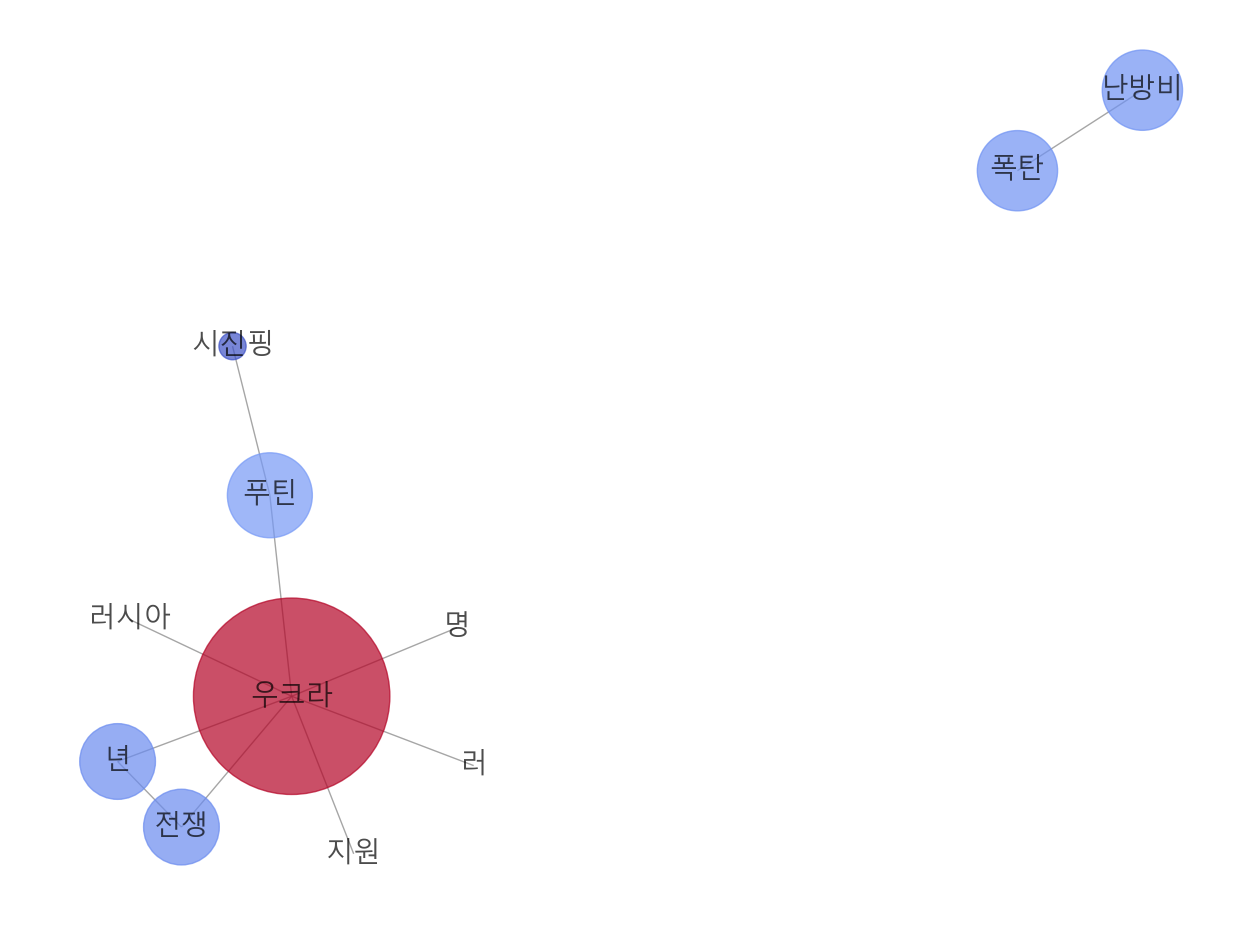

In [47]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000*(nsize-min(nsize)) / (max(nsize)-min(nsize))
pos = nx.spring_layout(G)                       #spring 레이아웃을 사용하기
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='Malgun Gothic', font_size=20, pos=pos,\
                 node_color=list(pr.values()), node_size=nsize*10, alpha=0.7,\
                 edge_color='.5', cmap=plt.cm.coolwarm)
plt.savefig('네트워크 그래프_우크라이나.png', bbox_inches='tight')